In [210]:
import numpy as np 
import pandas as pd
from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings('ignore')

In [211]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [212]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,3.694222,-1.682694,2.255104,2.198970,0.471965,0
1,1.599431,0.098154,-0.694870,0.718063,-1.980650,1
2,-0.159998,-0.505702,-2.163441,-2.603565,0.736568,0
3,-0.741476,2.974301,-0.054672,-0.639225,2.009910,1
4,-0.167182,-0.572917,-2.353071,-2.520748,1.460507,0


In [213]:
# function for row sampling 

def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [214]:
# function for feature sampling
import random
def sample_features(df,percent):
    cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [215]:
# function for combined sampling

def combined_sampling(df,row_percent, col_percent):
    new_df = sample_rows(df,row_percent)
    return sample_features(new_df,col_percent)

In [216]:
df1 = sample_rows(df,0.1)

In [217]:
df2 = sample_rows(df,0.1)

In [218]:
df3 = sample_rows(df,0.1)

In [219]:
df1.shape

(10, 6)

In [220]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [221]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [222]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'X[4] <= -0.495\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]')]

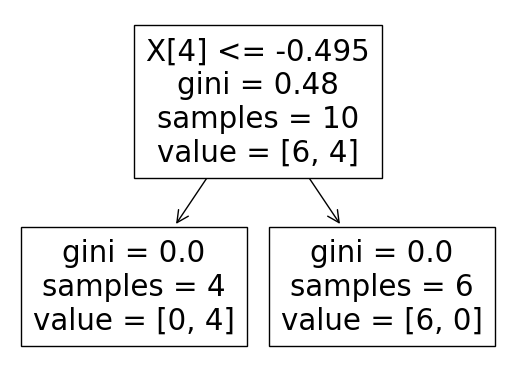

In [223]:
plot_tree(clf1)

[Text(0.6, 0.8333333333333334, 'X[4] <= -0.576\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.4, 0.5, 'X[0] <= 3.775\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]')]

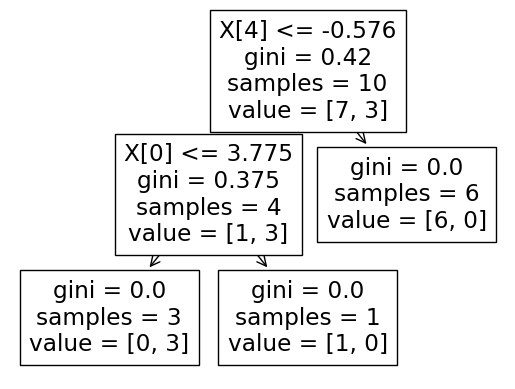

In [224]:
plot_tree(clf2)

[Text(0.4, 0.8333333333333334, 'X[3] <= -0.493\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.6, 0.5, 'X[1] <= -1.045\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

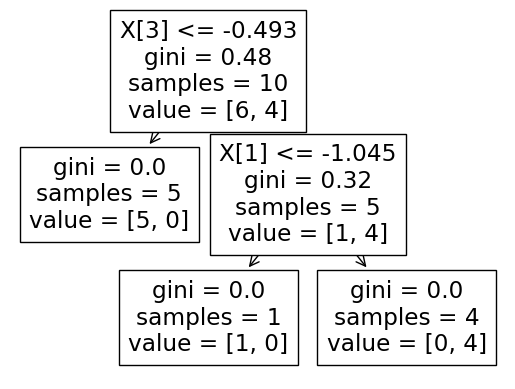

In [225]:
plot_tree(clf3)

In [226]:
clf1.predict(np.array([-3.635244, 1.170213, -3.026497, -1.485737, 0.010516]).reshape(1,5))

array([0])

In [227]:
clf2.predict(np.array([-3.635244, 1.170213, -3.026497, -1.485737, 0.010516]).reshape(1,5))

array([0])

In [228]:
clf3.predict(np.array([-3.635244, 1.170213, -3.026497, -1.485737, 0.010516]).reshape(1,5))

array([0])

In [229]:
df1 = sample_features(df ,0.8)

In [230]:
df2 = sample_features(df ,0.8)

In [231]:
df3 = sample_features(df ,0.8)

In [232]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [233]:
clf1.fit(df1.iloc[:,0:4],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:4],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:4],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.359375, 0.9375, 'X[1] <= -0.52\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.125, 0.8125, 'X[0] <= -1.256\ngini = 0.161\nsamples = 34\nvalue = [31, 3]'),
 Text(0.0625, 0.6875, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.1875, 0.6875, 'X[3] <= -0.955\ngini = 0.061\nsamples = 32\nvalue = [31, 1]'),
 Text(0.125, 0.5625, 'X[0] <= 2.995\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.0625, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1875, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.5625, 'gini = 0.0\nsamples = 30\nvalue = [30, 0]'),
 Text(0.59375, 0.8125, 'X[3] <= 0.8\ngini = 0.41\nsamples = 66\nvalue = [19, 47]'),
 Text(0.4375, 0.6875, 'X[1] <= -0.462\ngini = 0.074\nsamples = 26\nvalue = [1, 25]'),
 Text(0.375, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.5625, 'gini = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(0.75, 0.6875, 'X[0] <= -0.723\ngini = 0.495\nsamples = 40\nvalue = [18, 22]'),
 Text(0.625, 

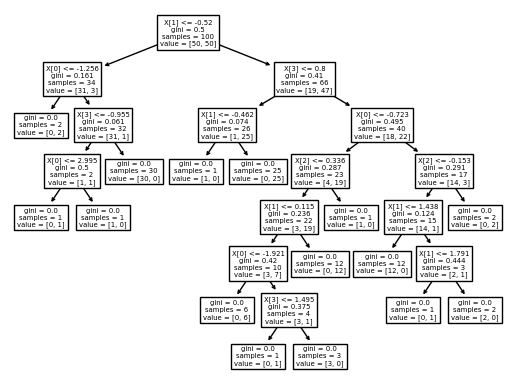

In [234]:
plot_tree(clf1)

[Text(0.359375, 0.9166666666666666, 'X[1] <= -0.52\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.125, 0.75, 'X[3] <= -1.256\ngini = 0.161\nsamples = 34\nvalue = [31, 3]'),
 Text(0.0625, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.1875, 0.5833333333333334, 'X[0] <= -0.955\ngini = 0.061\nsamples = 32\nvalue = [31, 1]'),
 Text(0.125, 0.4166666666666667, 'X[1] <= -2.836\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.0625, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1875, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.25, 0.4166666666666667, 'gini = 0.0\nsamples = 30\nvalue = [30, 0]'),
 Text(0.59375, 0.75, 'X[2] <= -1.433\ngini = 0.41\nsamples = 66\nvalue = [19, 47]'),
 Text(0.4375, 0.5833333333333334, 'X[0] <= -1.097\ngini = 0.208\nsamples = 17\nvalue = [15, 2]'),
 Text(0.375, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.4166666666666667, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(

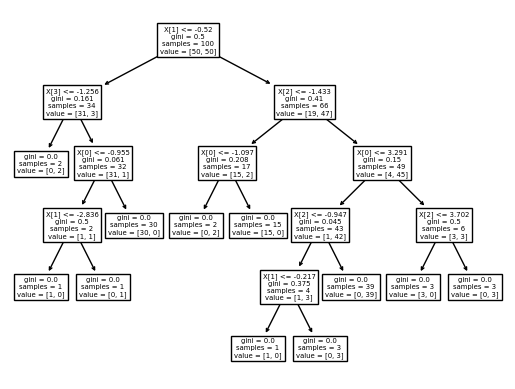

In [235]:
plot_tree(clf2)

[Text(0.359375, 0.9166666666666666, 'X[0] <= -0.52\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.125, 0.75, 'X[1] <= -1.256\ngini = 0.161\nsamples = 34\nvalue = [31, 3]'),
 Text(0.0625, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.1875, 0.5833333333333334, 'X[2] <= -0.955\ngini = 0.061\nsamples = 32\nvalue = [31, 1]'),
 Text(0.125, 0.4166666666666667, 'X[3] <= 0.213\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.0625, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1875, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.4166666666666667, 'gini = 0.0\nsamples = 30\nvalue = [30, 0]'),
 Text(0.59375, 0.75, 'X[3] <= -1.433\ngini = 0.41\nsamples = 66\nvalue = [19, 47]'),
 Text(0.4375, 0.5833333333333334, 'X[2] <= -1.097\ngini = 0.208\nsamples = 17\nvalue = [15, 2]'),
 Text(0.375, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.4166666666666667, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0

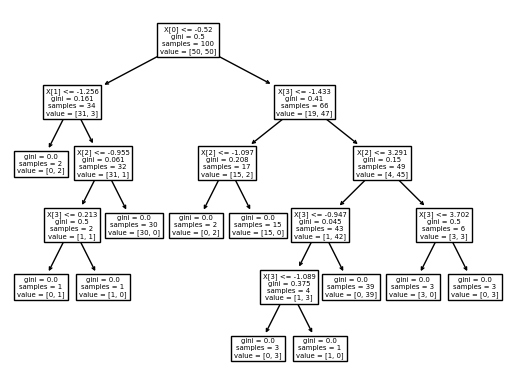

In [236]:
plot_tree(clf3)

In [237]:
print(df1.columns)
print(df2.columns)
print(df3.columns)


Index(['col5', 'col2', 'col3', 'col1', 'target'], dtype='object')
Index(['col1', 'col2', 'col4', 'col5', 'target'], dtype='object')
Index(['col2', 'col5', 'col1', 'col4', 'target'], dtype='object')


In [238]:
df3

,col2,col5,col1,col4,target
0,-1.682694,0.471965,3.694222,2.198970,0
1,0.098154,-1.980650,1.599431,0.718063,1
2,-0.505702,0.736568,-0.159998,-2.603565,0
3,2.974301,2.009910,-0.741476,-0.639225,1
4,-0.572917,1.460507,-0.167182,-2.520748,0
...,...,...,...,...,...
95,-0.201009,-0.556880,1.586508,-2.465091,0
96,-0.991973,1.125638,1.065399,-1.073565,0
97,0.252826,1.051853,1.625871,-2.209916,0
98,0.108869,-1.666416,2.783575,-2.024460,0


In [239]:
clf1.predict(np.array([0.283310,-1.467524,-1.940629,1.600220]).reshape(1,4))

array([0])

In [240]:
clf2.predict(np.array([0.283310,-1.467524,-1.940629,1.600220]).reshape(1,4))

array([0])

In [241]:
clf3.predict(np.array([0.283310,-1.467524,-1.940629,1.600220]).reshape(1,4))

array([1])

In [242]:
df1 = combined_sampling(df,0.5,0.5)

In [243]:
df2 = combined_sampling(df,0.5,0.5)

In [244]:
df3 = combined_sampling(df,0.5,0.5)

In [245]:
print(df1.columns)
print(df2.columns)
print(df3.columns)



Index(['col3', 'col2', 'target'], dtype='object')
Index(['col2', 'col3', 'target'], dtype='object')
Index(['col2', 'col3', 'target'], dtype='object')


In [246]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [247]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5, 0.9285714285714286, 'X[1] <= -0.441\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.2, 0.7857142857142857, 'X[1] <= -0.959\ngini = 0.153\nsamples = 24\nvalue = [22, 2]'),
 Text(0.1, 0.6428571428571429, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.3, 0.6428571428571429, 'X[1] <= -0.852\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.8, 0.7857142857142857, 'X[1] <= 0.481\ngini = 0.26\nsamples = 26\nvalue = [4, 22]'),
 Text(0.7, 0.6428571428571429, 'X[1] <= 0.234\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.6, 0.5, 'X[0] <= -0.35\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.5, 0.35714285714285715, 'X[0] <= -0.884\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.4, 0.21428571428571427, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6, 0.21428571428571427, 'X[0] <= -0.798\ngini = 0.375\nsamples = 4\nvalue = [1

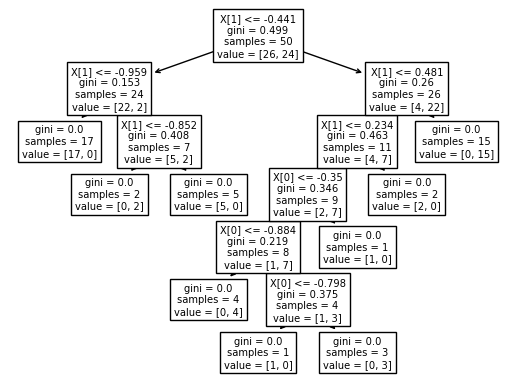

In [248]:
plot_tree(clf1)

[Text(0.6428571428571429, 0.95, 'X[0] <= 0.954\ngini = 0.449\nsamples = 50\nvalue = [33, 17]'),
 Text(0.42857142857142855, 0.85, 'X[0] <= -1.009\ngini = 0.343\nsamples = 41\nvalue = [32, 9]'),
 Text(0.35714285714285715, 0.75, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.5, 0.75, 'X[1] <= -3.233\ngini = 0.453\nsamples = 26\nvalue = [17, 9]'),
 Text(0.42857142857142855, 0.65, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.5714285714285714, 0.65, 'X[1] <= -0.246\ngini = 0.49\nsamples = 21\nvalue = [12, 9]'),
 Text(0.5, 0.55, 'X[1] <= -0.771\ngini = 0.5\nsamples = 18\nvalue = [9, 9]'),
 Text(0.35714285714285715, 0.45, 'X[1] <= -1.306\ngini = 0.463\nsamples = 11\nvalue = [7, 4]'),
 Text(0.2857142857142857, 0.35, 'X[0] <= 0.156\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.21428571428571427, 0.25, 'X[0] <= -0.215\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.14285714285714285, 0.15, 'X[0] <= -0.535\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.071428571428

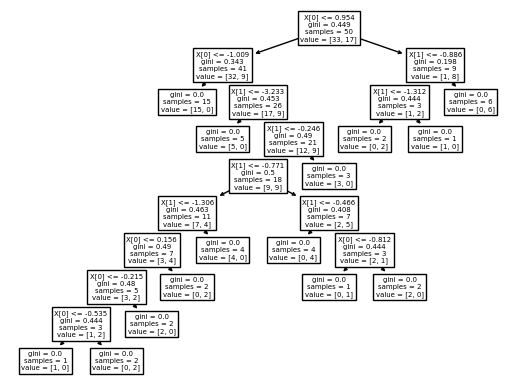

In [249]:
plot_tree(clf2)

[Text(0.5833333333333334, 0.9285714285714286, 'X[0] <= 0.332\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.3, 0.7857142857142857, 'X[1] <= -2.194\ngini = 0.4\nsamples = 29\nvalue = [21, 8]'),
 Text(0.13333333333333333, 0.6428571428571429, 'X[0] <= -0.862\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.06666666666666667, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4666666666666667, 0.6428571428571429, 'X[0] <= -0.418\ngini = 0.32\nsamples = 25\nvalue = [20, 5]'),
 Text(0.3333333333333333, 0.5, 'X[0] <= -0.959\ngini = 0.111\nsamples = 17\nvalue = [16, 1]'),
 Text(0.26666666666666666, 0.35714285714285715, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.4, 0.35714285714285715, 'X[0] <= -0.85\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.3333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4666666666666667, 0.21428571428571427, 'gini = 0.0\nsamples = 4

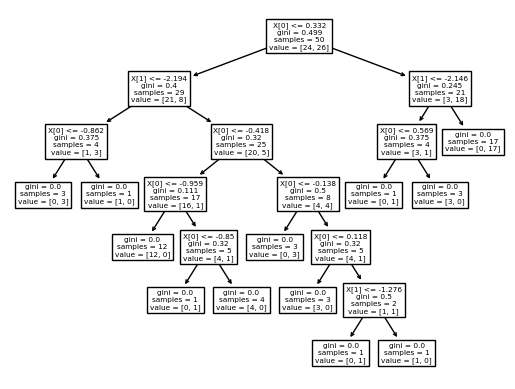

In [250]:
plot_tree(clf3)